# LIMPIEZA DE DATOS

## 1)- Importamos todas las librerías que necesitaremos para nuestro proyecto

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
import statsmodels.api as sm

## 2)- Importamos el dataset 

In [163]:
data = pd.read_csv('house.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## 3)- Eliminación de las columnas irrelevantes

#### Hay en total 4 columnas que he decidido eliminar al inicio, ya que veía claramente que no tenían ningún tipo de aporte para el modelo:

##### 1- Country: Esto debido a que todas las filas del dataframe tenían el nombre de USA, ya que todas las viviendas se encuentran en estados unidos

In [164]:
data['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

In [165]:
data = data.drop(columns = 'country')

##### 2- Street: He decidido eliminar esta columna debido a la enorme variabilidad que tienen las observaciones. Al apenas repetirse las observaciones , le será imposible al poder hacer una estimación adecuada del impacto del valor de la columna en el precio de la casa

In [166]:
data['street'].value_counts().count()

4525

In [167]:
len(data)

4600

In [168]:
data = data.drop(columns = 'street')

##### 3- Date: Esta columna es totalmente irrelevante porque registra la fecha en la que se han obtenido los datos de cada observación

In [169]:
data = data.drop(columns = 'date')

##### 5- Waterfront: Esta columna fue eliminada al tener muy pocos valores verdaderos (1 ya que se trata de un registro booleano) y esto provoca que muy probablemente se comporten como un outlier que afecte negativamente al desarrollo del modelo

In [170]:
data['waterfront'].value_counts()

waterfront
0    4567
1      33
Name: count, dtype: int64

In [171]:
data = data.drop(columns = 'waterfront')

## 4)- Creación de variables Dummy

#### El dataframe una vez eliminadas las columnas irrelevantes solo contenía dos variables categóricas que eran city y statezip

##### 1-) Primero codeamos las variables categóricas para que sean números en vez de palabras y de esta manera poder hacer luego el one hot encoder

In [172]:
labelEncoder = LabelEncoder()
data.iloc[:,13]=labelEncoder.fit_transform(data.iloc[:,13])
data.iloc[:,12]=labelEncoder.fit_transform(data.iloc[:,12])
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,36,62
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,35,58
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,18,26
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,3,7
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,31,31


##### 2-) Posteriormente, se realiza el one hot encoder y se manipulan en dos arrays diferentes para manejarlos con mayor facilidad.

In [173]:
oneHotEnc= OneHotEncoder()
data_dummy_city = oneHotEnc.fit_transform(data[['city']]).toarray()
data_dummy_statezip = oneHotEnc.fit_transform(data[['statezip']]).toarray()

##### 3-) Una vez hecho el paso anterior ahora tocará eliminar una columna en cada una de nuestras arrays para evitar la multicolinealidad perfecta que podría arruinar nuestro modelo de regresión

In [174]:
data_dummy_city = np.delete(data_dummy_city, 0 ,axis = 1)
data_dummy_statezip = np.delete(data_dummy_statezip, 0, axis = 1)

##### 4-) Finalmente, lo que hacemos es convertir ambos arrays en dos dataframes para posteriormente unirlos al dataframe principal sin antes eliminar también las columnas city y statezip

In [175]:
data_dummy_city = pd.DataFrame(data_dummy_city)
data_dummy_statezip = pd.DataFrame(data_dummy_statezip)
data = data.drop(columns = 'city')
data = data.drop(columns = 'statezip')
data = pd.concat([data,data_dummy_statezip,data_dummy_city], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,...,33,34,35,36,37,38,39,40,41,42
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,280,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5)- Estandarización de los datos

#### Al ser un dataframe con escalas muy dispares (hay algunas columnas con valores que van de 0 a 5 y otras de 50 a 3000) esto podria alterar la regresion provocando que algunas variables influyan mucho mas que otras, ademas de que es necesario en algoritmos como los bosques aleatorios.

In [176]:
standScaler = StandardScaler()
data[['bedrooms','sqft_living','bathrooms','sqft_lot','floors','view','condition',
   'sqft_above','sqft_basement','yr_built','yr_renovated']]=data[['bedrooms','sqft_living','bathrooms','sqft_lot',
    'floors','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']].astype(np.float32)
data[['bedrooms','sqft_living','bathrooms','sqft_lot','floors','view','condition',
   'sqft_above','sqft_basement','yr_built','yr_renovated']]=standScaler.fit_transform(data[['bedrooms','sqft_living',
   'bathrooms','sqft_lot','floors','view','condition','sqft_above',
   'sqft_basement','yr_built','yr_renovated']])
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,...,33,34,35,36,37,38,39,40,41,42
0,313000.0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.309194,-0.667112,-0.565224,-0.672464,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384000.0,1.759705,0.432802,1.568528,-0.161718,0.906555,4.830080,2.286416,1.789559,-0.069128,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342000.0,-0.441122,-0.205201,-0.217367,-0.080977,-0.951388,-0.309194,0.809652,0.119171,-0.672464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420000.0,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.309194,0.809652,-0.959621,1.482306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,550000.0,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.309194,0.809652,-0.797222,1.051352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### (He estandarizado todas las columnas menos el precio, ya que es la variable dependiente y por ahora no será necesario estandarizarlo y las variables dummy, ya que son variables booleanas, solo 0 y 1).

## 6)- Optimización del dataframe

#### Ahora tenemos 131 columnas, lo cual es una cantidad enorme de columnas si tenemos pensado generar un escalado polinómico, ya que provocará problemas de dimensionalidad, así que he desarrollado 3 funciones que en conjunto se encargan de eliminar las variables que no son lo suficientemente relevantes a nivel estadístico de manera automática teniendo en cuenta su P-valor y su impacto en el R2 y R2 ajustado

##### 1-) getX: esta función lo que hace es añadir una columna llena de 1 al inicio necesaria para poder hacer la regresión lineal con OLS y así poder obtener los valores de la precisión del modelo y la relevancia de las variables además de convertir el dataframe en una lista de listas
##### "parámetros" (data : corresponde al dataframe que queremos tratar)
##### "return" (una lista de lista del dataframe)

In [177]:
def getX(data : pd.DataFrame):
    X = data.iloc[:,1:]
    X = np.append(np.ones((len(X),1)).astype(int), values=X, axis = 1)
    X = X[:,:].tolist()
    return X

##### 2-) choseLast: este algoritmo lo que hace es valorar si quedarse con el nuevo modelo o el según cuanto se hayan modificado valores de R2 y R2 ajustado. Es parametrizable para poder probar con diferentes criterios de decisión y de esta manera poder encontrar el equilibrio entre la eliminación de variables y la puntuación de los mismos
##### "parámetros" (R2before: es el valor de R2 que tenía el modelo antes de eliminar la última columna, R2Abefore: es el valor de R2 ajustado que tenía el modelo antes de eliminar la última columna,R2after: es el valor de R2 que tiene el modelo después de eliminar la última columna,R2Aafter: es el valor de R2 ajustado del modelo después de eliminar la última columna,AdjWins : es el valor mínimo de diferencia a favor del R2Ajustado para quedarse con el último modelo o no, worseningLimit: es el límite de empeoramiento que puede tener el R2 o el R2 ajustado cuando ambos son inferiores después de eliminar la última variable)
##### "return" (un booleano indicando si se queda con el último modelo o no)

In [178]:
def choseLast(R2before,R2Abefore,R2after,R2Aafter,R2AdjWins, worseningLimit):
    if R2after<R2before:
        if R2Aafter>R2Abefore:
            if (R2before-R2after)-(R2Aafter-R2Abefore)>-R2AdjWins:
                result = True
            else:
                result = False
        else:
            if (R2before-R2after)>worseningLimit or (R2Abefore-R2Aafter)>worseningLimit:
                result = False
            else:
                result = True
    else:
        result=True
    return result

##### 3-) optimizeDataset: esta función lo que hace es aplicar el algoritmo de reducción hacia atrás para según una serie de criterios suministrados a través de los parámetros de la función, escoge el modelo con el mejor equilibrio de volumen y precisión
##### "parámetros":
##### -data: es el dataframe original que quieres optimizar
##### -SL: es el valor máximo de p-valor permitido para que la variable se mantenga dentro del dataframe
##### -r2AdjWins: es el valor mínimo de diferencia a favor del R2Ajustado para quedarse con el último modelo o no
##### -worseningLimit: es el límite de emparejamiento que puede tener el R2 o el R2 ajustado cuando ambos son inferiores después de eliminar la última variable
##### "return" (el dataframe ya optimizado con menos columnas)

In [179]:
def optimizeDataset (data : pd.DataFrame, SL : float,r2AdjWins : float, worseningLimit : float) -> pd.DataFrame:
    dataC = data.copy()
    X = getX(data)
    y = data.iloc[:,0]
    reg_OLS = sm.OLS(endog = y, exog= X).fit()
    prevR2=reg_OLS.rsquared
    prevR2Adj=reg_OLS.rsquared_adj
    finish = False
    while not finish:
        lista = reg_OLS.pvalues
        maximo = lista.max()
        if maximo > SL:
            index = lista[lista == maximo].index
            dataC.drop(dataC.columns[lista.index.get_loc(index[0])],axis = 1,inplace = True)
            X = getX(dataC)
            reg_OLS = sm.OLS(endog = y, exog= X).fit()
            postR2=reg_OLS.rsquared
            postR2Adj=reg_OLS.rsquared_adj
            if choseLast(prevR2, prevR2Adj , postR2, postR2Adj,r2AdjWins,worseningLimit):
                data = dataC.copy()
                prevR2=postR2
                prevR2Adj=postR2Adj
            else:
                finish=True
        else:
            finish = True
    return data

#### Una vez creadas las funciones para automatizar el proceso de reducción hacia atrás lo empiezo a ejecutar modificando los parámetros para obtener el mayor equilibrio entre tamaño y precisión.

##### Obtenemos el R2 y el R2 ajustado original para comparar próximamente con el dataframe optimizado (el R2 y el R2 ajustado serán muy bajos, ya que este caso no sigue una tendencia lineal recta, pero sirve para saber el nivel de significación de las variables a nivel estadístico para el caso)

In [180]:
X = getX(data)
y = data.iloc[:,0]
reg_OLS = sm.OLS(endog = y, exog= X).fit()

In [181]:
r2 = reg_OLS.rsquared
r2

0.3019851934185368

In [182]:
r2a = reg_OLS.rsquared_adj#
r2a

0.2856764362554185

In [183]:
data.shape

(4600, 131)

##### Después de cambiar los parámetros en varias ocasiones he obtenido el resultado que considero que mejor se equilibra entre precisión y eficiencia

In [184]:
data = optimizeDataset(data, 0.05,0.03,0.02)

In [185]:
X = getX(data)
reg_OLS = sm.OLS(endog = y, exog= X).fit()

In [186]:
r2O = reg_OLS.rsquared
r2O

0.27261898354246017

In [187]:
r2aO = reg_OLS.rsquared_adj
r2aO

0.2683234263586558

In [188]:
data.shape

(4600, 29)

##### A sido una optimización bastante exitosa, ya que se ha eliminado el 88% de las columnas a cambio de reducir únicamente el 6% del R2 ajustado y el 10% del R2

## 7)- Eliminación de los outliers

#### Esta parte la hice después de probar el modelo de regresión polinómica al ver que no estaba dando unos buenos resultados, pero lo pongo aquí porque forma parte del procesamiento y la limpieza de los datos

##### 1) Se eliminan las filas que tienen el precio igual a 0 porque esas filas estaban provocando que el modelo diese valores negativos a la hora de predecir, lo cual una vez que se han eliminado estas columnas no ha vuelto a ocurrir

In [189]:
indexPrice0 = data[data['price'] == 0].index
data.drop(indexPrice0,inplace = True)

In [190]:
data.shape

(4551, 29)

##### 2) Se hace una visualización de los datos para ver de qué manera se podrían eliminar los outliers, se hace una visión de la distribución de los datos en cada columna

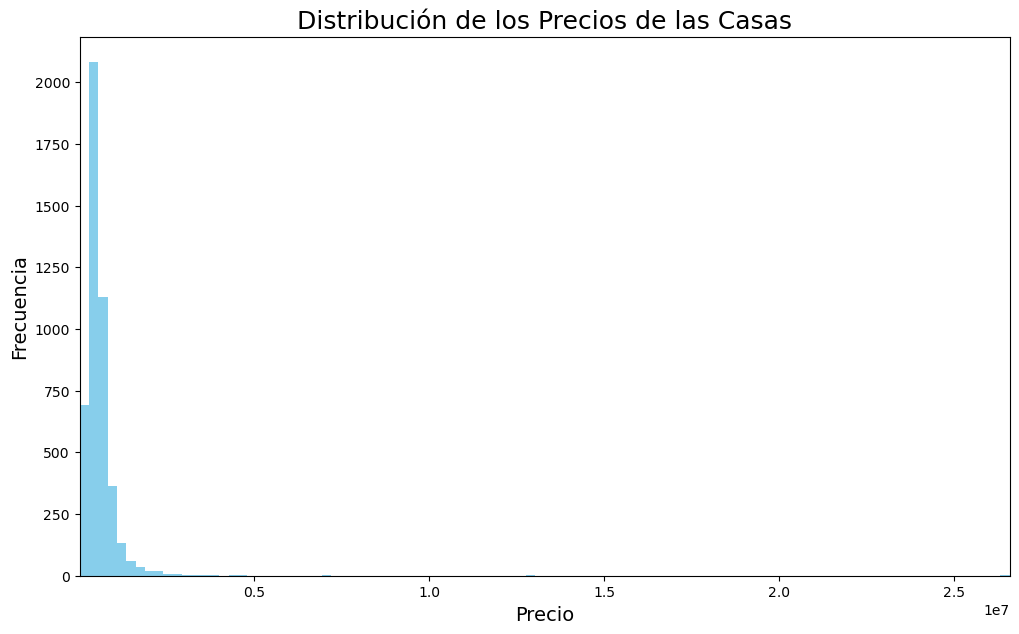

In [191]:
plt.figure(figsize=(12, 7))
plt.hist(data['price'], bins=100, color='skyblue',range=(data['price'].min(), data['price'].max()))
plt.title('Distribución de los Precios de las Casas', fontsize=18)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xlim(data['price'].min(), data['price'].max())
plt.show()

##### Verlo de esta forma podría indicar que hay valores demasiado elevados que son muy poco frecuentes, ahora vamos a mirar desde el mínimo hasta el valor 12000000

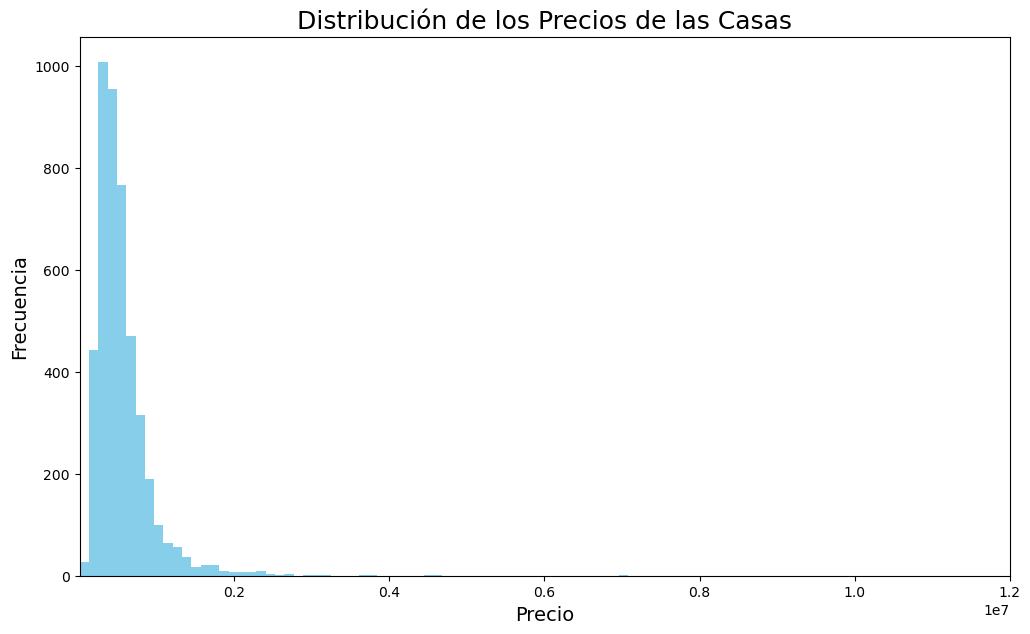

In [192]:
plt.figure(figsize=(12, 7))
plt.hist(data['price'], bins=100, color='skyblue',range=(data['price'].min(), 12000000))
plt.title('Distribución de los Precios de las Casas', fontsize=18)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xlim(data['price'].min(), 12000000)
plt.show()

##### Vamos a hacer otra visualización más, pero desde los 2 millones

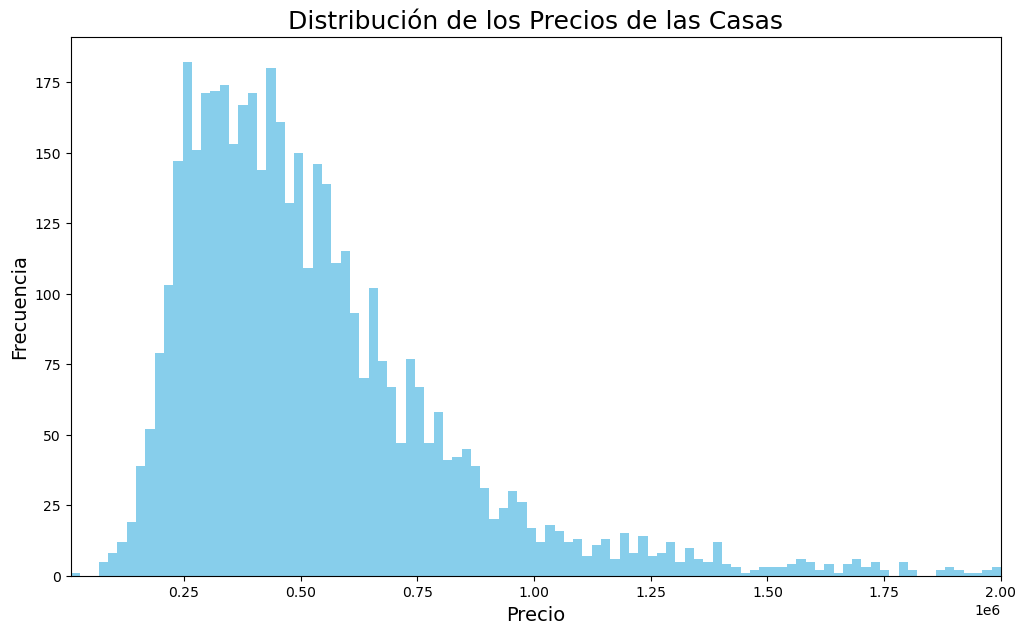

In [193]:
plt.figure(figsize=(12, 7))
plt.hist(data['price'], bins=100, color='skyblue',range=(data['price'].min(), 2000000))
plt.title('Distribución de los Precios de las Casas', fontsize=18)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xlim(data['price'].min(), 2000000)
plt.show()

##### Volvemos a hacer lo mismo pero desde el millón

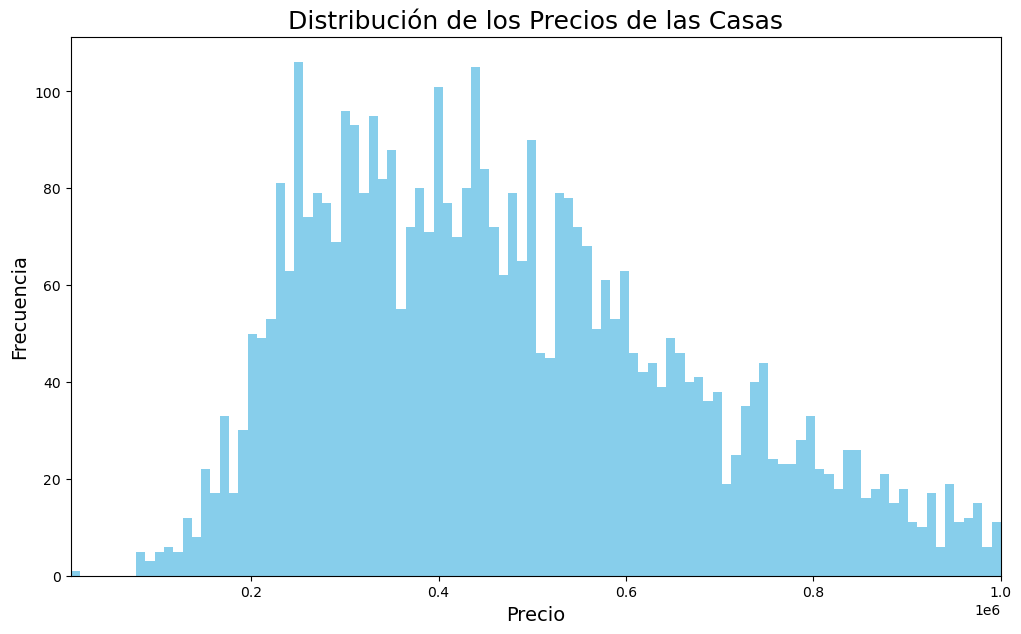

In [194]:
plt.figure(figsize=(12, 7))
plt.hist(data['price'], bins=100, color='skyblue',range=(data['price'].min(), 1000000))
plt.title('Distribución de los Precios de las Casas', fontsize=18)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xlim(data['price'].min(), 1000000)
plt.show()

##### Eliminaremos todos los que estén por debajo de 150000 y todos los que estén por encima de los 1000000

In [195]:
data = data[data['price'] <= 1000000]
data = data[data['price'] >= 150000]

In [196]:
data.shape

(4159, 29)

##### Se vuelve a hacer la visualización de los datos del precio

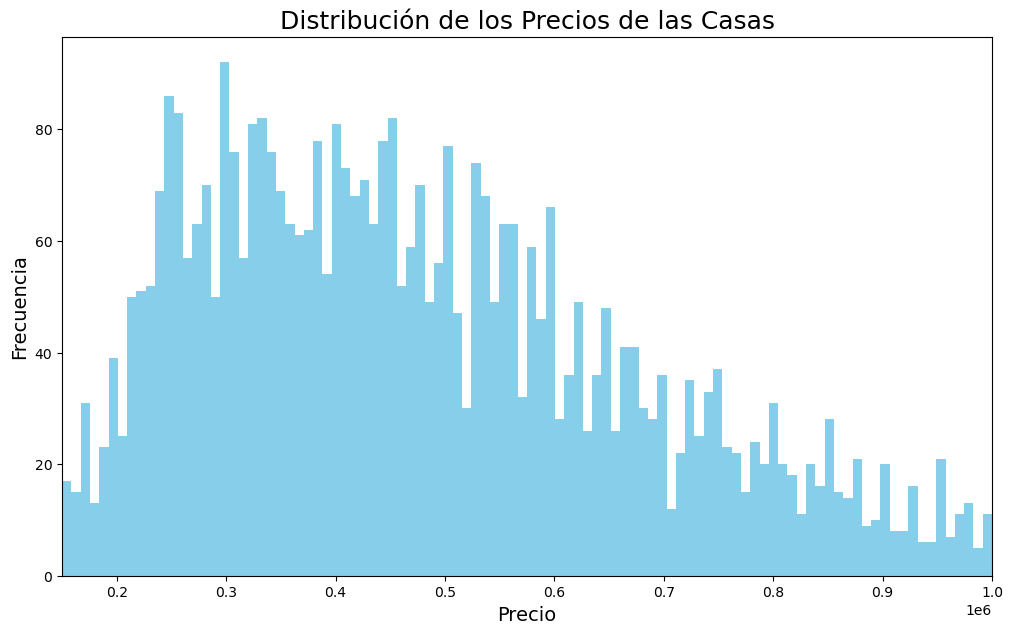

In [197]:
plt.figure(figsize=(12, 7))
plt.hist(data['price'], bins=100, color='skyblue',range=(data['price'].min(), data['price'].max()))
plt.title('Distribución de los Precios de las Casas', fontsize=18)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xlim(data['price'].min(),data['price'].max())
plt.show()

##### Así quedaría nuestra columna de precios, debido a que es la variable dependiente, no sería necesario normalizar los datos pese a que tenga un sesgo hacia la izquierda. Pasamos a analizar la siguiente columna

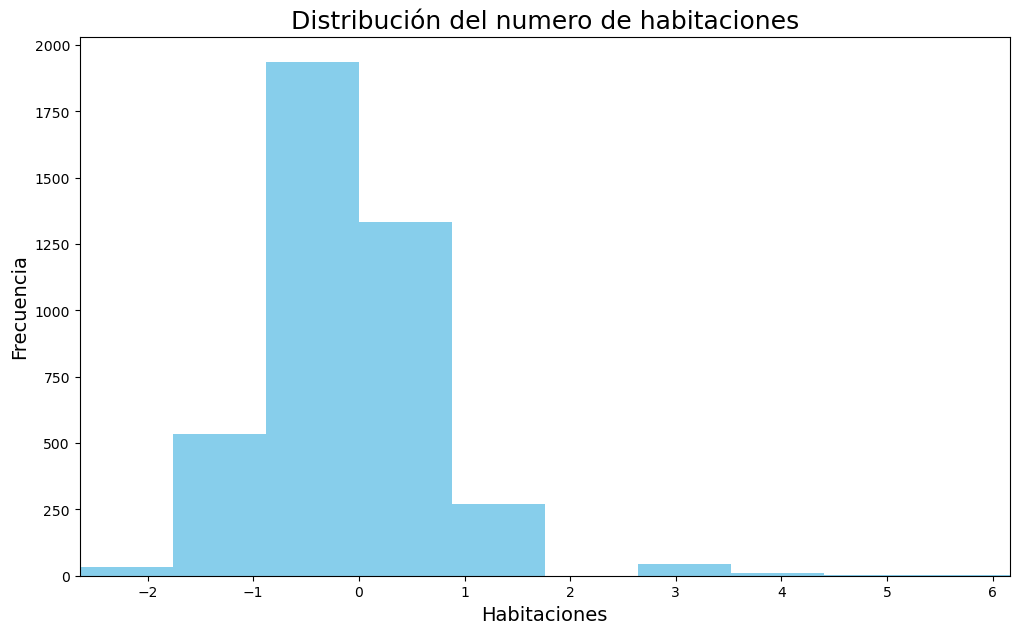

In [198]:
plt.figure(figsize=(12, 7))
plt.hist(data['bedrooms'], bins=10, color='skyblue',range=(data['bedrooms'].min(), data['bedrooms'].max()))
plt.title('Distribución del numero de habitaciones', fontsize=18)
plt.xlabel('Habitaciones', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xlim(data['bedrooms'].min(), data['bedrooms'].max())
plt.show()

In [199]:
data['bedrooms'].value_counts()

bedrooms
-0.441122    1935
 0.659291    1332
-1.541536     536
 1.759705     269
 2.860118      43
-2.641949      32
 3.960531      10
 6.161359       1
 5.060946       1
Name: count, dtype: int64

##### Vamos a eliminar las filas con el valor inferior a -2 y superior a 2, ya que son valores anómalos y al ser muy poco frecuentes

In [200]:
data = data[data['bedrooms'] <= 2]
data = data[data['bedrooms'] >= -2]

In [201]:
data.shape

(4072, 29)

##### Ya se han eliminado los datos anómalos, ahora se procederá a eliminar los datos anómalos de la siguiente columna

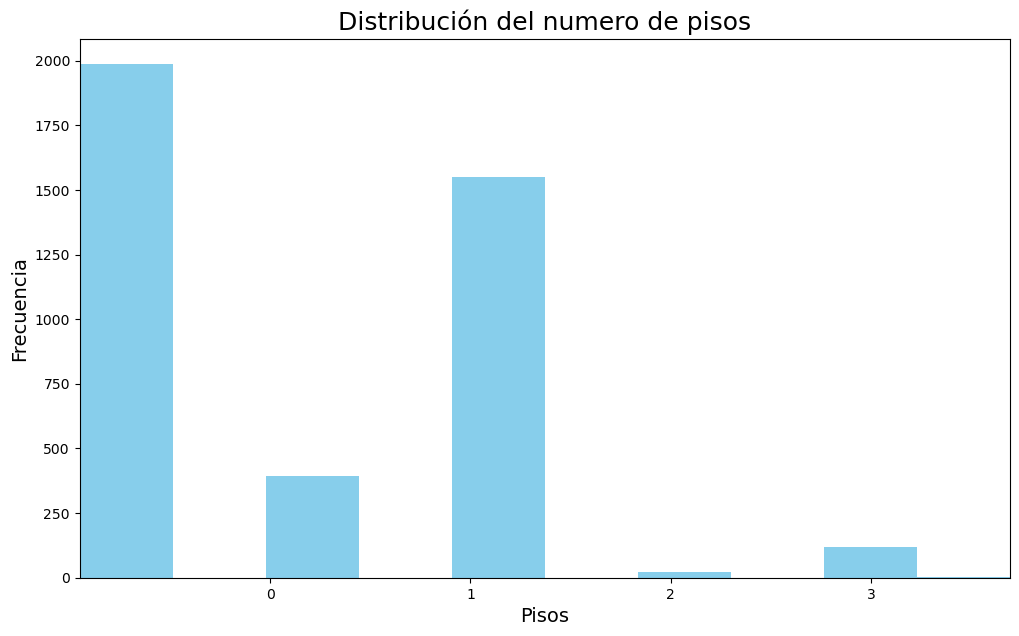

In [202]:
plt.figure(figsize=(12, 7))
plt.hist(data['floors'], bins=10, color='skyblue',range=(data['floors'].min(), data['floors'].max()))
plt.title('Distribución del numero de pisos', fontsize=18)
plt.xlabel('Pisos', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xlim(data['floors'].min(), data['floors'].max())
plt.show()

In [203]:
data['floors'].value_counts()

floors
-0.951388    1986
 0.906555    1550
-0.022416     394
 2.764497     119
 1.835526      22
 3.693468       1
Name: count, dtype: int64

##### Se eliminarán los datos superiores a 1 e inferiores a 2,7 y los datos superiores a 3

In [204]:
data = data[(data['floors'] <= 1) | (data['floors'] >= 3)]
data = data[data['floors'] <=3]
data.shape

(3930, 29)

##### Ahora se van a eliminar los outliers de la columna views

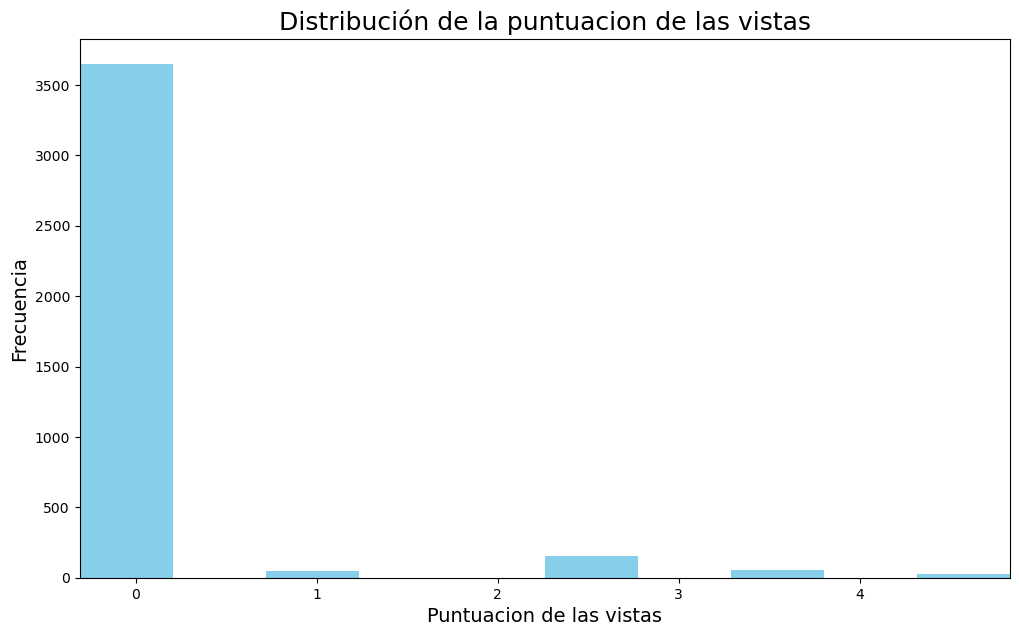

In [205]:
plt.figure(figsize=(12, 7))
plt.hist(data['view'], bins=10, color='skyblue',range=(data['view'].min(), data['view'].max()))
plt.title('Distribución de la puntuacion de las vistas', fontsize=18)
plt.xlabel('Puntuacion de las vistas', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xlim(data['view'].min(), data['view'].max())
plt.show()

In [206]:
data['view'].value_counts()

view
-0.309194    3646
 2.260442     156
 3.545261      57
 0.975624      48
 4.830080      23
Name: count, dtype: int64

In [207]:
data[['price','view']].corr()

,price,view
price,1.000000,0.198713
view,0.198713,1.000000


##### Pese a tener una correlación baja, es posible que tenga una relación no lineal con el precio de la casa, así que mantendremos la columna sobre todo para ser aprovechada en el random forest

##### Pasamos a analizar la siguiente columna

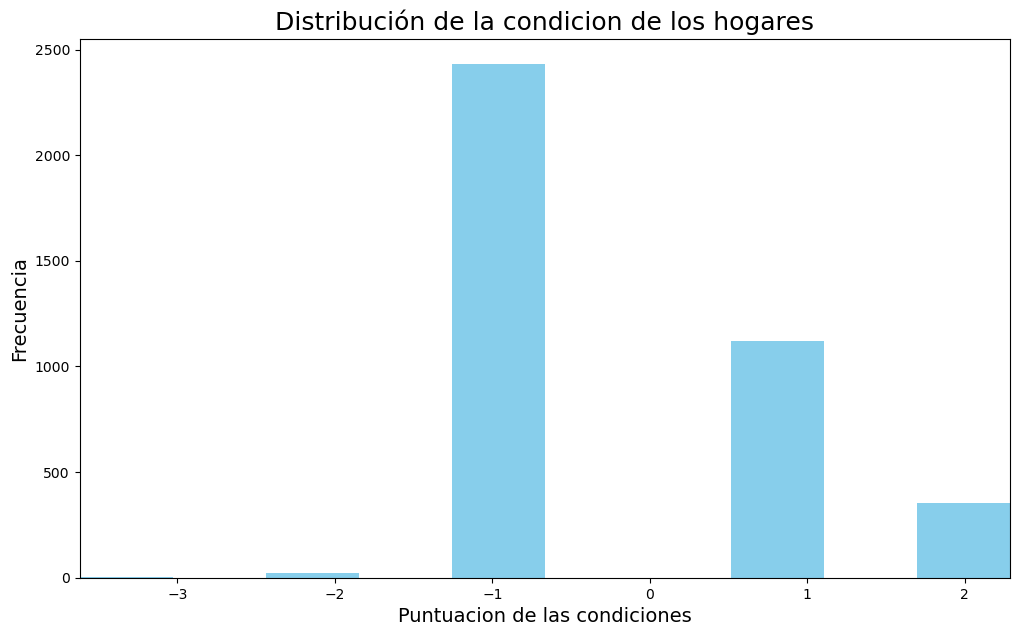

In [208]:
plt.figure(figsize=(12, 7))
plt.hist(data['condition'], bins=10, color='skyblue',range=(data['condition'].min(), data['condition'].max()))
plt.title('Distribución de la condicion de los hogares', fontsize=18)
plt.xlabel('Puntuacion de las condiciones', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xlim(data['condition'].min(), data['condition'].max())
plt.show()

In [209]:
data['condition'].value_counts()

condition
-0.667112    2430
 0.809652    1119
 2.286416     354
-2.143876      22
-3.620641       5
Name: count, dtype: int64

##### Todos los valores inferiores a -2 serán eliminados al ser considerados outliers

In [210]:
data = data[data['condition'] >= -2]

In [211]:
data.shape

(3903, 29)

##### Pasamos a la siguiente columna

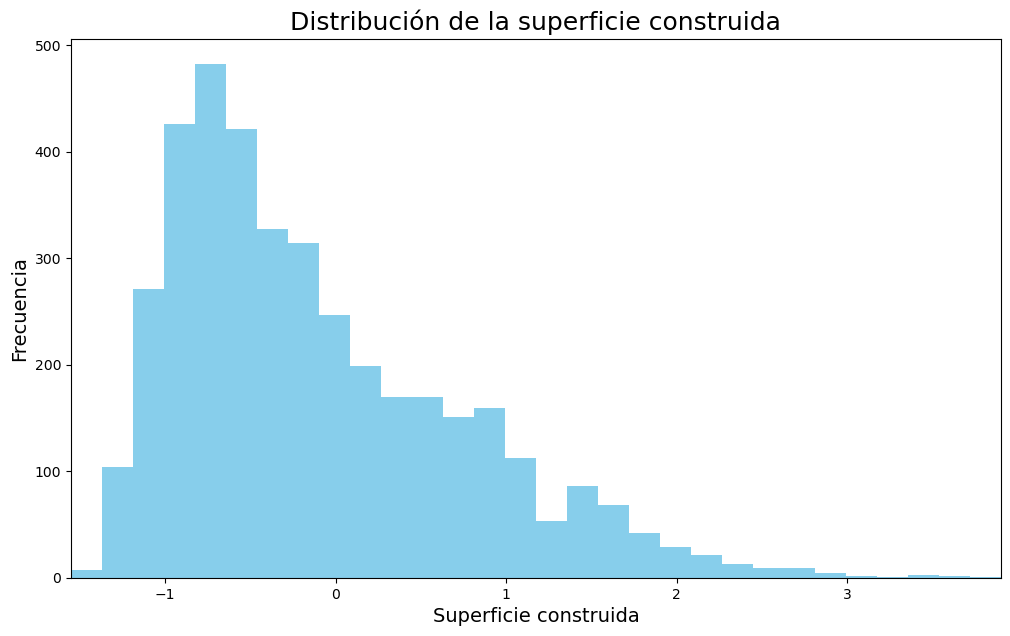

In [212]:
plt.figure(figsize=(12, 7))
plt.hist(data['sqft_above'], bins=30, color='skyblue',range=(data['sqft_above'].min(), data['sqft_above'].max()))
plt.title('Distribución de la superficie construida', fontsize=18)
plt.xlabel('Superficie construida', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xlim(data['sqft_above'].min(), data['sqft_above'].max())
plt.show()

##### Primero vamos a eliminar el sesgo que hay hacia la izquierda dentro de esta distribución

In [213]:
data.loc[:,'sqft_above_yeojohnson'] = pt.fit_transform(data[['sqft_above']])

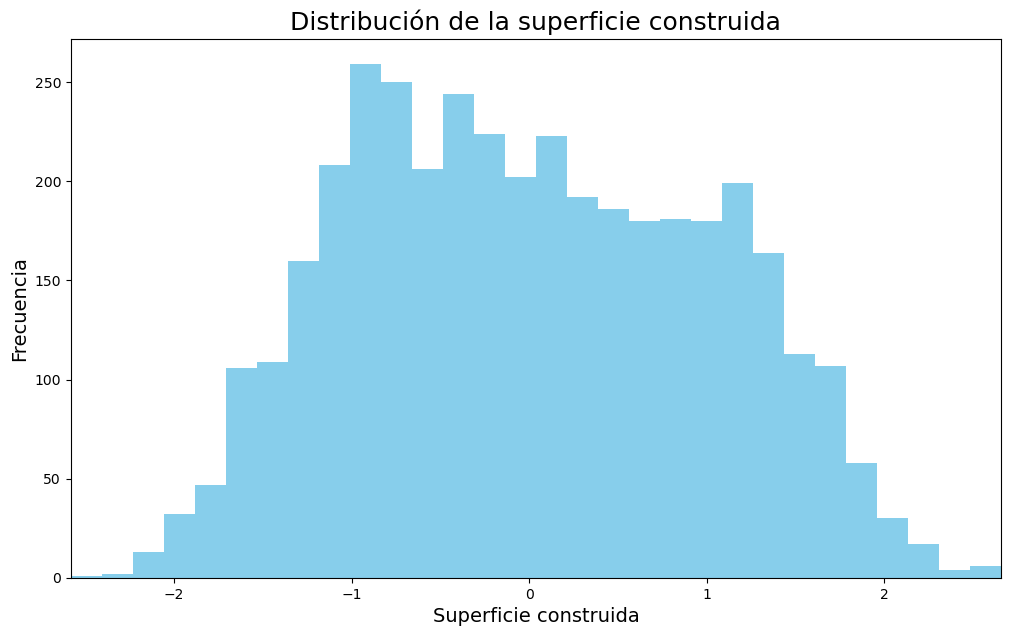

In [214]:
plt.figure(figsize=(12, 7))
plt.hist(data['sqft_above_yeojohnson'], bins=30, color='skyblue',range=(data['sqft_above_yeojohnson'].min(), data['sqft_above_yeojohnson'].max()))
plt.title('Distribución de la superficie construida', fontsize=18)
plt.xlabel('Superficie construida', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xlim(data['sqft_above_yeojohnson'].min(), data['sqft_above_yeojohnson'].max())
plt.show()

##### Por último se van a eliminar los valores superiores a dos e inferiores a dos

In [216]:
data = data[data['sqft_above_yeojohnson'] <= 2]
data = data[data['sqft_above_yeojohnson'] >= -2]

In [217]:
data.shape

(3841, 30)

##### Ahora pasamos a la última columna con variable continua

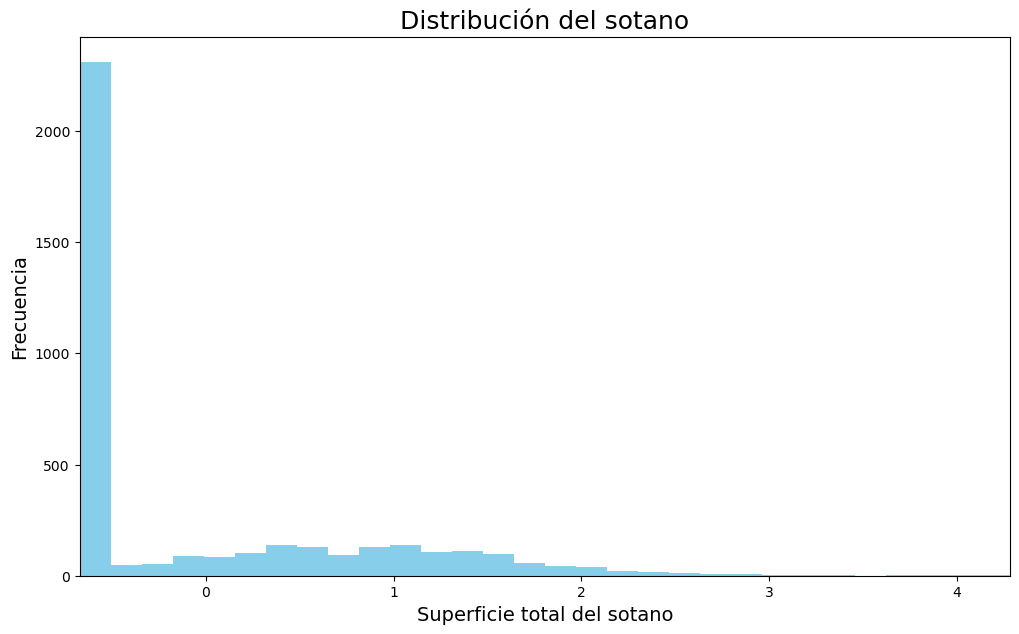

In [218]:
plt.figure(figsize=(12, 7))
plt.hist(data['sqft_basement'], bins=30, color='skyblue',range=(data['sqft_basement'].min(), data['sqft_basement'].max()))
plt.title('Distribución del sotano', fontsize=18)
plt.xlabel('Superficie total del sotano', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xlim(data['sqft_basement'].min(), data['sqft_basement'].max())
plt.show()

In [219]:
data[['price','sqft_basement']].corr()

,price,sqft_basement
price,1.000000,0.229295
sqft_basement,0.229295,1.000000


##### La mayoría de las casas no tienen sótano, y por eso está dominado por el 0, pese a tener una baja correlación lineal, es posible que tenga una relación no lineal así que lo mantendremos para poder aprovecharlo con el random forest

## 7) Guardado del dataframe ya limpiado en un csv

#### Ahora que ya hemos procesado y limpiado los datos procedemos a registrarlos en un csv

In [221]:
data.head()

,price,bedrooms,floors,view,condition,sqft_above,sqft_basement,2,20,22,...,57,58,62,63,72,73,2,20,22,sqft_above_yeojohnson
0,313000.0,-0.441122,-0.022416,-0.309194,-0.667112,-0.565224,-0.672464,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443794
2,342000.0,-0.441122,-0.951388,-0.309194,0.809652,0.119171,-0.672464,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.531898
3,420000.0,-0.441122,-0.951388,-0.309194,0.809652,-0.959621,1.482306,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.199296
4,550000.0,0.659291,-0.951388,-0.309194,0.809652,-0.797222,1.051352,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.871731
5,490000.0,-1.541536,-0.951388,-0.309194,-0.667112,-1.098820,-0.672464,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.498083


In [223]:
data.to_csv('Data_house_cleaned.csv',index = False)